<a href="https://colab.research.google.com/github/Federico-Villa/TAM-2025-2/blob/main/Gradiente_descendiente/clase_11_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from sklearn.datasets import make_regression
N=1000
P=20
X, y=make_regression(n_samples=N, n_features=P, noise=0.1, random_state=42)
print(X.shape)
print(y.shape)

(1000, 20)
(1000,)


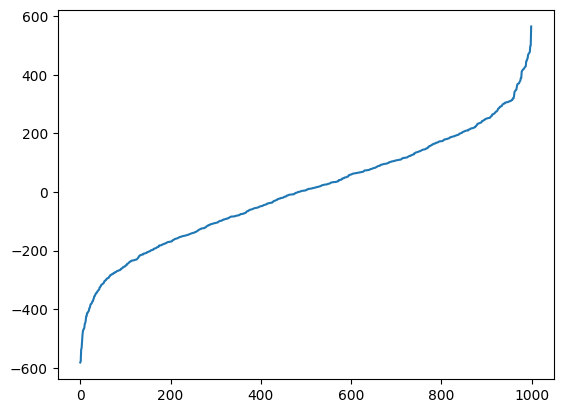

In [13]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.sort(y))
plt.show()

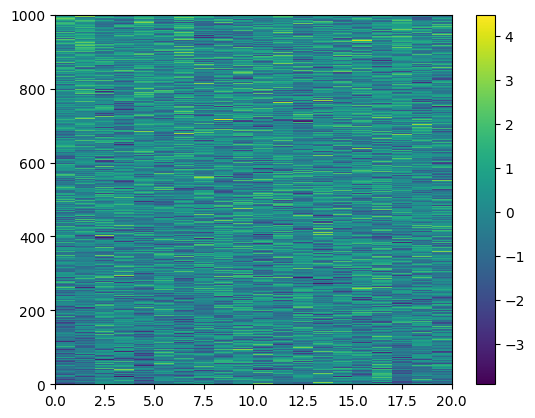

In [14]:
ind_=np.argsort(y)
plt.pcolormesh(X[ind_])
plt.colorbar()
plt.show()

In [15]:
def mincua_reg(X,y,lam_=1e-3):
  alpha=np.linalg.inv(X.T.dot(X)+lam_*np.eye(X.shape[1])).dot(X.T).dot(y)
  return alpha

[ 8.00015870e+01  9.85791489e+01  5.56725661e+00  2.42188895e-03
  8.64660571e+01 -3.94762241e-03  6.94305381e+01 -3.55913015e-04
  2.38018824e-03 -3.12018555e-03  1.86066282e+01  3.96353668e+01
  4.92664004e-04  3.10348876e+00 -4.42266205e-03  2.63864234e+01
 -2.42866192e-03  8.68824516e+01  3.51389388e-03  1.62268274e-03]


<StemContainer object of 3 artists>

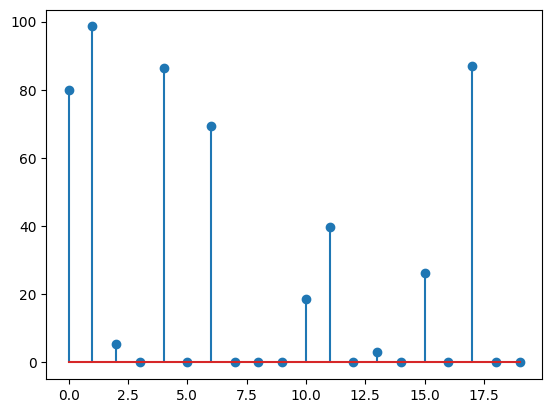

In [16]:
alpha=mincua_reg(X,y)
print(alpha)
plt.stem(np.abs(alpha))

In [17]:
y_esti= X.dot(alpha)

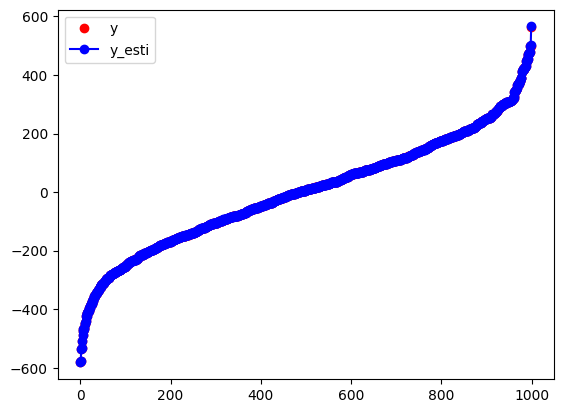

In [18]:

plt.plot(y[ind_],"o", c="r",label="y")
plt.plot(y_esti[ind_], c="b", marker="o",label="y_esti")
plt.legend()
plt.show()

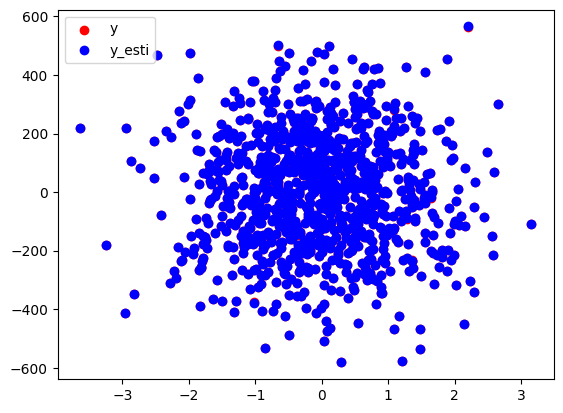

In [19]:
plt.scatter(X[ind_, 0], y, c="r", marker="o", label="y")
plt.scatter(X[ind_, 0], y_esti, c="b", marker="o", label="y_esti")

plt.legend()
plt.show()

In [20]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])


(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


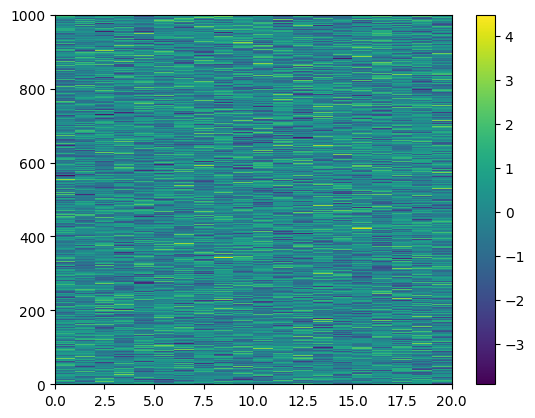

In [21]:
X_house= housing.data
y_house= housing.target
plt.pcolormesh(X)
plt.colorbar()
plt.show()

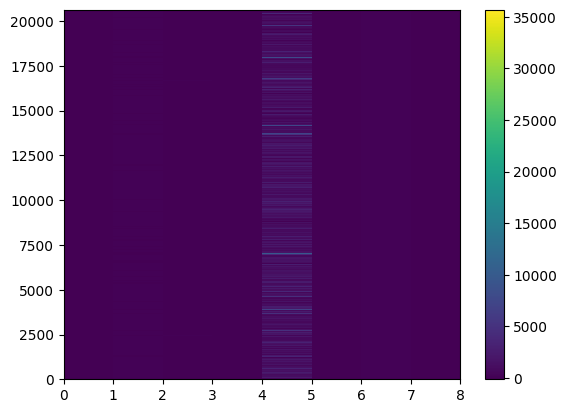

IndexError: index 19802 is out of bounds for axis 0 with size 1000

In [22]:
ind_=np.argsort(y_house)
plt.pcolormesh(X_house[ind_])
plt.colorbar()
plt.show()
plt.plot(y[ind_])
plt.show

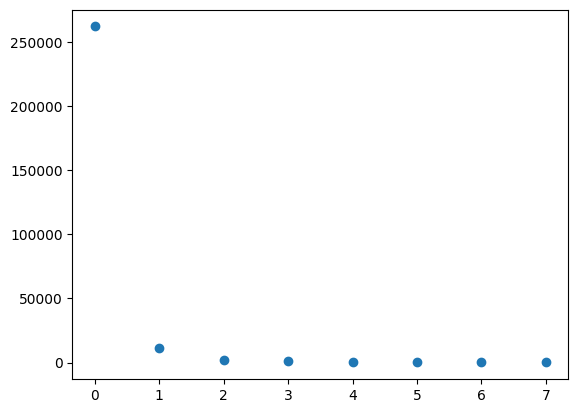

In [23]:
U,S, Vh=np.linalg.svd(X_house)
plt.scatter(np.arange(len(S)),S)
plt.show()

[ 5.13515017e-01  1.56511122e-02 -1.82527999e-01  8.65097653e-01
  7.79231011e-06 -4.69928946e-03 -6.39458572e-02 -1.63827338e-02]


<StemContainer object of 3 artists>

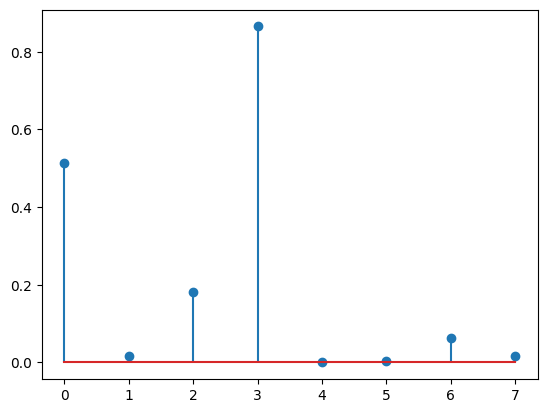

In [24]:
alpha=mincua_reg(X_house,y_house)
print(alpha)
plt.stem(np.abs(alpha))

In [26]:
y_estimada= X_house.dot(alpha)

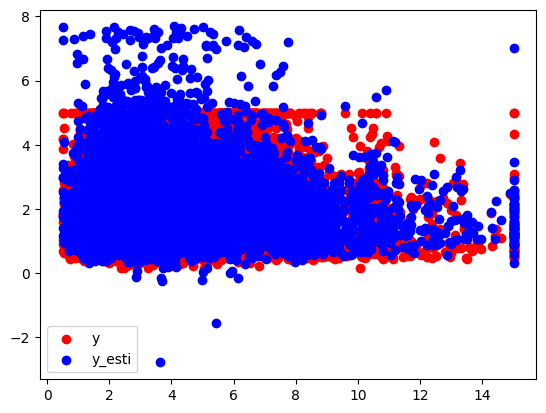

In [27]:
plt.scatter(X_house[ind_, 0], y_house, c="r", marker="o", label="y")
plt.scatter(X_house[ind_, 0], y_estimada, c="b", marker="o", label="y_esti")

plt.legend()
plt.show()

In [35]:
def ridge_grad_desc(X, y, lam=1e-3, lr=1e-3, n_iter=1000):
    """
    Estima alpha usando gradiente descendente para regresión Ridge.
    X: matriz de datos (N, P)
    y: vector objetivo (N,)
    lam: regularización
    lr: learning rate
    n_iter: número de iteraciones
    """
    N, P = X.shape
    alpha = np.zeros(P)  # inicializamos coeficientes

    for i in range(n_iter):
        # cálculo del gradiente
        grad = -2 * X.T.dot (y - X.dot(alpha)) + 2 * lam * alpha
        # actualización de alpha
        alpha -= lr * grad

    return alpha

In [36]:
alpha_closed = mincua_reg(X, y)  # solución cerrada
alpha_gd = ridge_grad_desc(X, y, lam=1e-3, lr=1e-5, n_iter=5000)

print("Gradiente descendente:", alpha_gd[:5])

Solución cerrada: [8.00015870e+01 9.85791489e+01 5.56725661e+00 2.42188895e-03
 8.64660571e+01]
Gradiente descendente: [8.00015870e+01 9.85791489e+01 5.56725661e+00 2.42188895e-03
 8.64660571e+01]
